In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##   1. Reading the data

In [2]:
#reading file 
df=pd.read_csv("cubic_zirconia.csv", sep=",")
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


 ##  2. Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Number of rows and columns in dataframe
df.shape

(26967, 11)

In [5]:
# Column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
# Summary for the numeric columns 
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [7]:
df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


Price is the target variable for this dataset and others variables are predictor variables

## 3. Data Quality check and Missing values

### A. Finding missing values  for all columns

In [8]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [9]:
# Percentage of null values in all columns
100*(df.isnull().sum() /df.shape[0]).round(2)

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         3.0
table         0.0
x             0.0
y             0.0
z             0.0
price         0.0
dtype: float64

The Null values are only 3 percent of the data, so we choose to drop the data

In [10]:
#renaming the columns
df.rename(columns={'x':'Length','y':'Width','z':'Heigth'}, inplace = True)

### B .Suggesting imputed values for colum having null values

In [11]:
#dropping column 1[Unamed] as it does not add value to the data

df=df.drop(["Unnamed: 0"],axis=1)

In [12]:
# indices with Length, Width, Height, Depth as 0 as these data values dont add any value for the data , A Diamond with 
#0 Length, Width, Height, Depth is not available

print("Fields with Length as 0 \n\n" ,df[df['Length']==0])
print("\n Fields with Width as 0 \n\n" ,df[df['Width']==0])
print("\n Fields with Height as 0 \n\n" ,df[df['Heigth']==0])
print("\n Fields with Depth as 0 \n\n ",df[df['depth']==0])


Fields with Length as 0 

        carat   cut color clarity  depth  table  Length  Width  Heigth  price
5821    0.71  Good     F     SI2   64.1   60.0     0.0    0.0     0.0   2130
6215    0.71  Good     F     SI2   64.1   60.0     0.0    0.0     0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0     0.0    0.0     0.0   6381

 Fields with Width as 0 

        carat   cut color clarity  depth  table  Length  Width  Heigth  price
5821    0.71  Good     F     SI2   64.1   60.0     0.0    0.0     0.0   2130
6215    0.71  Good     F     SI2   64.1   60.0     0.0    0.0     0.0   2130
17506   1.14  Fair     G     VS1   57.5   67.0     0.0    0.0     0.0   6381

 Fields with Height as 0 

        carat      cut color clarity  depth  table  Length  Width  Heigth  \
5821    0.71     Good     F     SI2   64.1   60.0    0.00   0.00     0.0   
6034    2.02  Premium     H     VS2   62.7   53.0    8.02   7.95     0.0   
6215    0.71     Good     F     SI2   64.1   60.0    0.00   0.00     0.0

In [13]:
# dropping indices with Length, Width, Height, Depth as 0
df=df.drop(df[df['Length']==0].index)
df=df.drop(df[df['Width']==0].index)
df=df.drop(df[df['Heigth']==0].index)

In [14]:
df.shape

(26958, 10)

In [15]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
Length       0
Width        0
Heigth       0
price        0
dtype: int64

In [16]:
df[(df["depth"].isnull())]

,carat,cut,color,clarity,depth,table,Length,Width,Heigth,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [18]:
# Percentage of null values in all columns
100*(df.isnull().sum() /df.shape[0]).round(2)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      3.0
table      0.0
Length     0.0
Width      0.0
Heigth     0.0
price      0.0
dtype: float64

The Null values are only 3 percent of the data, so we choose to drop the data

In [19]:
df=df.dropna()

In [20]:
#checking for duplicate rows
df.duplicated().sum()

33

In [21]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(26228, 10)

### C. Checking   data type for categorical and Continuous cols


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26228 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26228 non-null  float64
 1   cut      26228 non-null  object 
 2   color    26228 non-null  object 
 3   clarity  26228 non-null  object 
 4   depth    26228 non-null  float64
 5   table    26228 non-null  float64
 6   Length   26228 non-null  float64
 7   Width    26228 non-null  float64
 8   Heigth   26228 non-null  float64
 9   price    26228 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


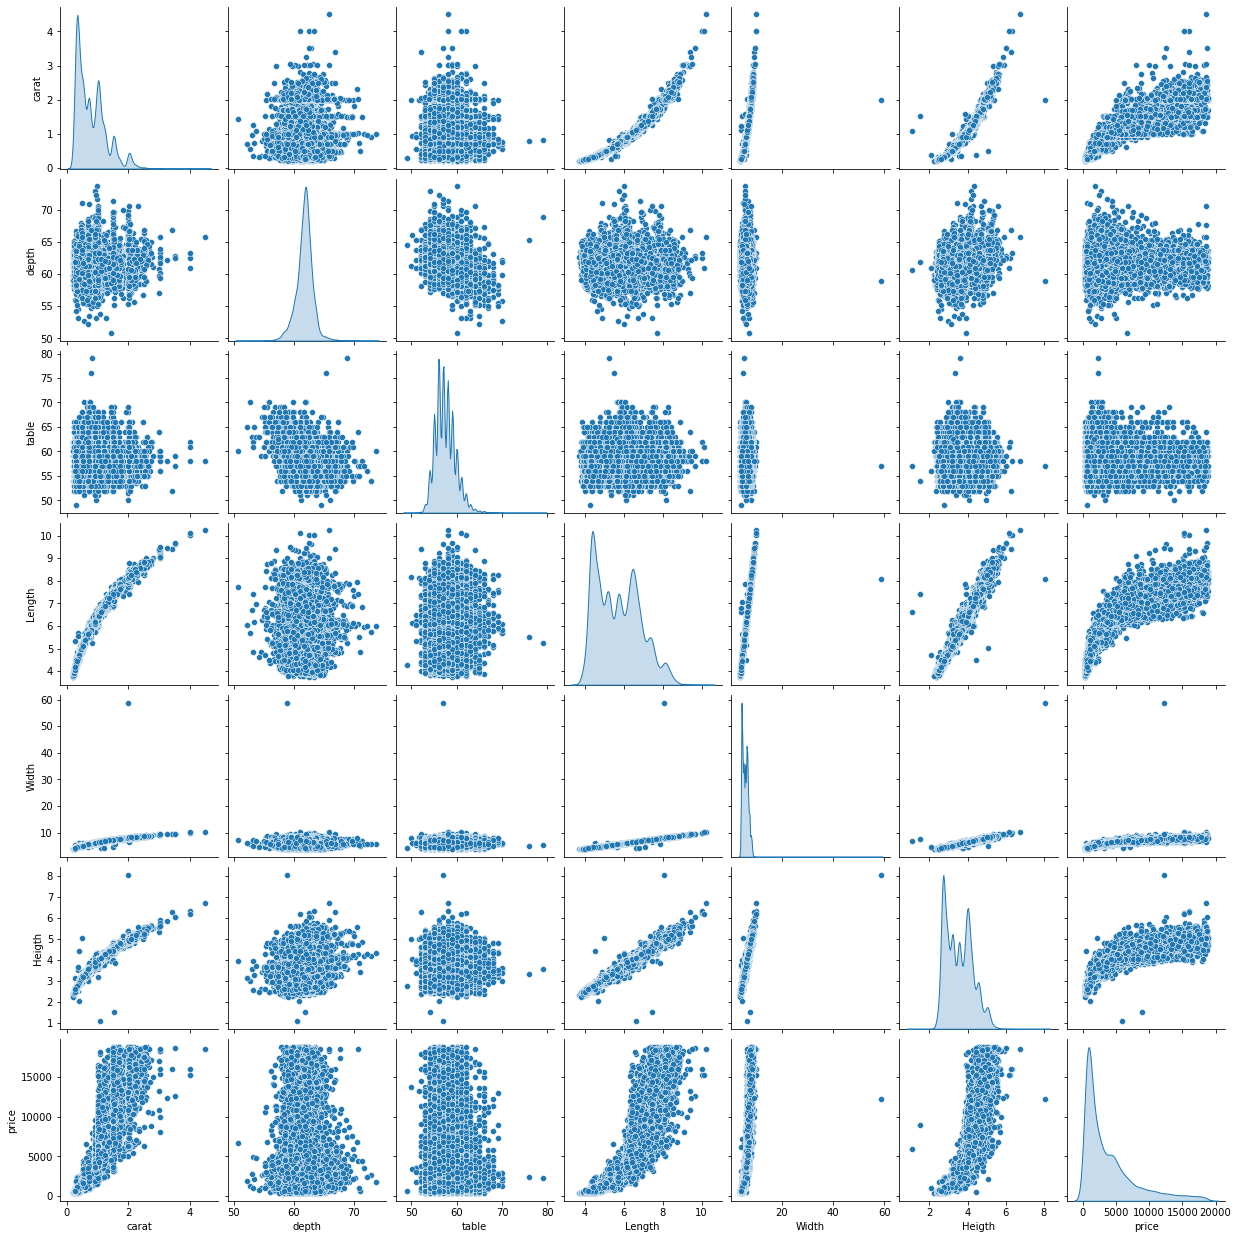

In [24]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

### D. Checking outliers for numeric columns

In [25]:

Numeric_columns=df.select_dtypes(exclude='object')
Numeric_columns.columns

Index(['carat', 'depth', 'table', 'Length', 'Width', 'Heigth', 'price'], dtype='object')

C:\Users\Teressa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Teressa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Teressa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Teressa\anaconda

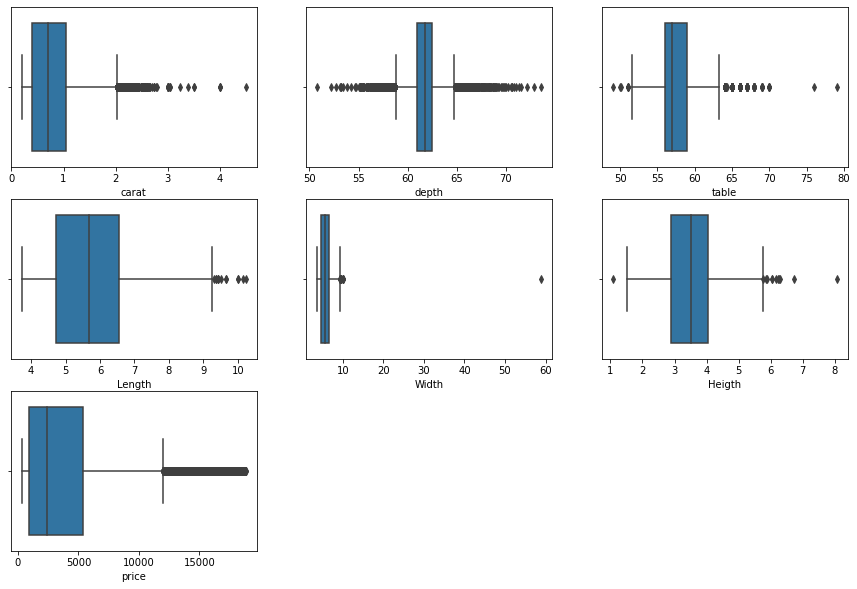

In [26]:
plt.figure(figsize=[15,10])
plt.subplot(3,3,1)
sns.boxplot(df['carat'])
plt.subplot(3,3,2)
sns.boxplot(df['depth'])
plt.subplot(3,3,3)
sns.boxplot(df['table'])
plt.subplot(3,3,4)
sns.boxplot(df['Length'])
plt.subplot(3,3,5)
sns.boxplot(df['Width'])
plt.subplot(3,3,6)
sns.boxplot(df['Heigth'])
plt.subplot(3,3,7)
sns.boxplot(df['price'])
plt.show()

Observations :  As seen above, we have outliers in the data

## 4. Analysis

### A.  Univariate Anlysis for categorical variables.

Univariate analysis for Categorical Cols

C:\Users\Teressa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Teressa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Teressa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


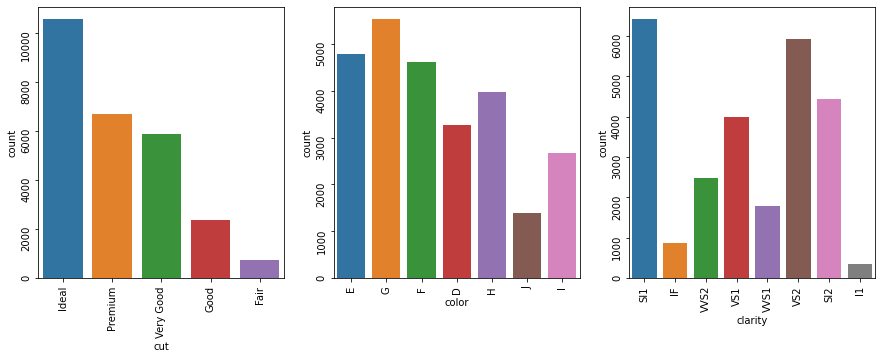

In [27]:
## Uni-Categorical

plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.countplot(df['cut'])


plt.subplot(1,3,2)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.countplot(df['color'])

plt.subplot(1,3,3)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.countplot(df['clarity'])
plt.show()

Univariate analysis for Continuous Variables

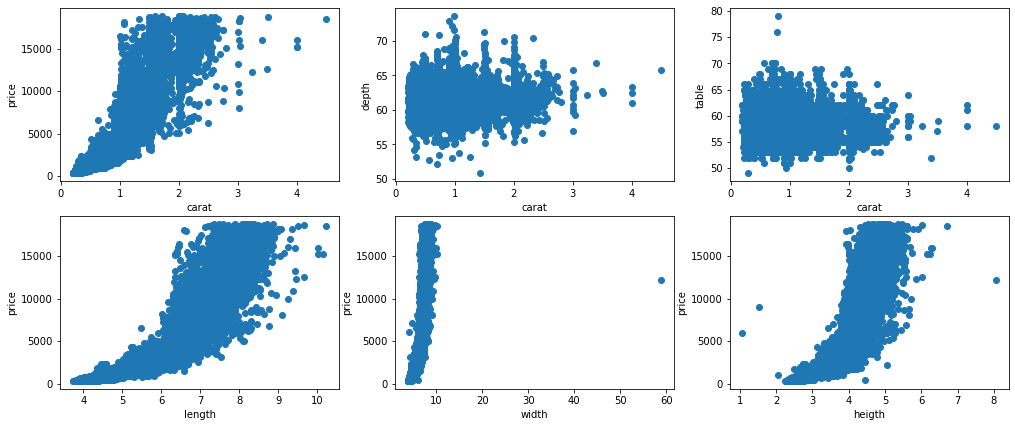

In [28]:
#['carat', 'depth', 'table', 'Length', 'Width', 'Heigth', 'price']


plt.figure(figsize = (17, 7))
plt.subplot(2,3,1)
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(df['carat'],df['price'])


plt.subplot(2,3,2)
plt.xlabel('carat')
plt.ylabel('depth')
plt.scatter(df['carat'],df['depth'])

plt.subplot(2,3,3)
plt.xlabel('carat')
plt.ylabel('table')
plt.scatter(df['carat'],df['table'])

plt.subplot(2,3,4)
plt.xlabel('length')
plt.ylabel('price')
plt.scatter(df['Length'],df['price'])


plt.subplot(2,3,5)
plt.xlabel('width')
plt.ylabel('price')
plt.scatter(df['Width'],df['price'])

plt.subplot(2,3,6)
plt.xlabel('heigth')
plt.ylabel('price')
plt.scatter(df['Heigth'],df['price'])
plt.show()

  Bivariate analysis for CATEGORICAL- CONTINUOUS  variables

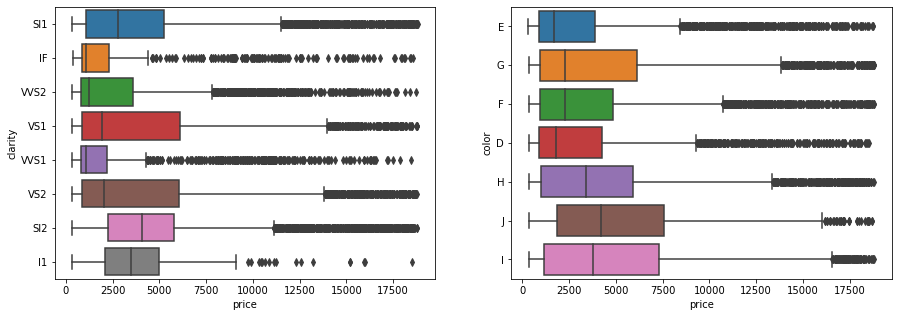

In [29]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(y='clarity' ,x='price',data=df)


plt.subplot(1,2,2)
sns.boxplot(y='color' ,x='price',data=df)
plt.show()

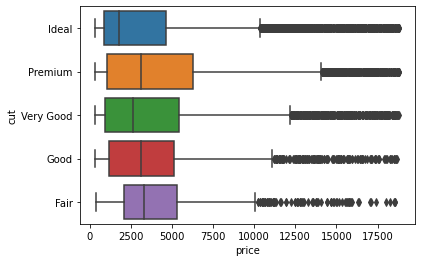

In [30]:
sns.boxplot(y='cut' ,x='price',data=df)
plt.show()

Correlation for numerical cols

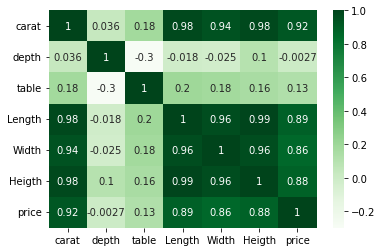

In [31]:
sns.heatmap(df[['carat', 'depth', 'table', 'Length', 'Width', 'Heigth', 'price']].corr(),cmap='Greens',annot = True)
plt.show()

Based on the above heat map we can say that PRICE is directly corelated to the CARAT. Length, Width, Height also has high corelation.